# Energy_landscape_analysis

# Transition graphs of energy landscapes

We have seen in the package Transition_graph_of_energy_landscape_builders that there are three options to build a transitio graph:
* from a database of stationary points
* from a collection of pairs (sample, associated local minimum)
* from a collection of samples.

In the following, we exploit such transition, as explained in the User manual.

## Useful functions

In [1]:
from SBL.SBL_pytools import SBL_pytools as sblpyt
help(sblpyt)


Help on class SBL_pytools in module SBL_pytools:

class SBL_pytools(builtins.object)
 |  Static methods defined here:
 |  
 |  convert_eps_to_png(ifname, osize)
 |  
 |  convert_pdf_to_png(ifname, osize)
 |  
 |  find_and_convert(suffix, odir, osize)
 |      # find file with suffix, convert, and return image file
 |  
 |  find_and_show_images(suffix, odir, osize)
 |  
 |  find_file_in_output_directory(suffix, odir)
 |  
 |  show_eps_file(eps_file, osize)
 |  
 |  show_image(img)
 |  
 |  show_log_file(odir)
 |  
 |  show_pdf_file(pdf_file)
 |  
 |  show_row_n_images(images, size)
 |  
 |  show_text_file(file_suffix, odir)
 |  
 |  show_txt_file(file_suffix, odir)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



## Running the executables: main options

The options of the <b>analyze</b> method in the next cell are:
 - <em>metric</em>: euclid or lrmsd
 - <em>transGraph</em>: xml file representing the compressed transition graph of a sampled energy landscape
 - <em>landmarks</em>: run shortest paths analysis through landmark vertices on the compressed transition graph listed on an input text file
 - <em>topology</em>: run topology analysis over the uncompressed transition graph
 - <em>Morse</em>: run Morse theory based analysis over the uncompressed transition graph with the potential energy as Morse function

In [11]:
import re  #regular expressions
import sys #misc system
import os
import pdb
import shutil # python 3 only
from IPython.display import Image
from IPython.display import IFrame


def analyze_transition_graph(metric, transGraph, landmarks = None, topology = True, Morse = True):

    odir = "tmp-results-%s" % metric
    if os.path.exists(odir):
        os.system("rm -rf %s" % odir)
    os.system( ("mkdir %s" % odir) )
    
    # check executable exists and is visible
    exe = shutil.which("sbl-energy-landscape-analysis-%s.exe" % metric)
    if not exe: 
        print("Executable not found")
        return 
    
   
    print(("Using executable %s\n" % exe))
    cmd = "sbl-energy-landscape-analysis-%s.exe --transition-graph %s \
              --directory %s --verbose --log " % (metric, transGraph, odir)
    if landmarks:
        cmd += "--landmarks --landmarks-filename %s " % landmarks
    if topology:
        cmd += "--topology "
    if Morse:
        cmd += "--Morse "
         
    print(("Executing %s\n" % cmd))   
    os.system(cmd)
        
    cmd = "ls %s" % odir
    ofnames = os.popen(cmd).readlines()
    print(("All output files in %s:" % odir),ofnames,"\n")
        
    sblpyt.show_log_file(odir)
   
        
 

## Example 1: the Himmelblau terrain z=f(x,y)


The Himmelblau function is defined by the bivariate polynomial $f(x,y) = (x^2+y-11)^2 + (x+y^2-7)^2$.

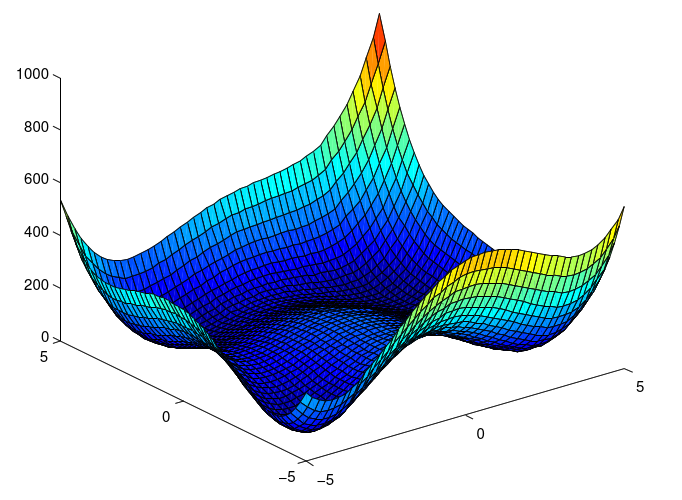

In [3]:
from IPython.display import Image
Image(filename='fig/himmelblau-matlab-cropped.png')

In [12]:

print("Marker : Calculation Started")
analyze_transition_graph("euclid", "data/himmelbleau_tg.xml", landmarks = "data/himmelbleau_landmarks.txt")       
print("Marker : Calculation Ended")

Marker : Calculation Started
Using executable /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-energy-landscape-analysis-euclid.exe

Executing sbl-energy-landscape-analysis-euclid.exe --transition-graph data/himmelbleau_tg.xml               --directory tmp-results-euclid --verbose --log --landmarks --landmarks-filename data/himmelbleau_landmarks.txt --topology --Morse 

All output files in tmp-results-euclid: ['sbl-energy-landscape-analysis-euclid__disconnectivity_forest.eps\n', 'sbl-energy-landscape-analysis-euclid__landmarks_paths.xml\n', 'sbl-energy-landscape-analysis-euclid__log.txt\n', 'sbl-energy-landscape-analysis-euclid__MSW_chain_complex.xml\n', 'sbl-energy-landscape-analysis-euclid__persistence_diagram.pdf\n', 'sbl-energy-landscape-analysis-euclid__persistence_diagram.plot\n', 'sbl-energy-landscape-analysis-euclid__persistence_diagram.txt\n', 'sbl-energy-landscape-analysis-euclid__persistence_histogram.pdf\n', 'sbl-energy-landscape-analysis-euclid__persistence_histog

In [5]:
## We can now easily visualize the main plots i.e. the disconnectivity forest and the persistence diagram

Figs displayed


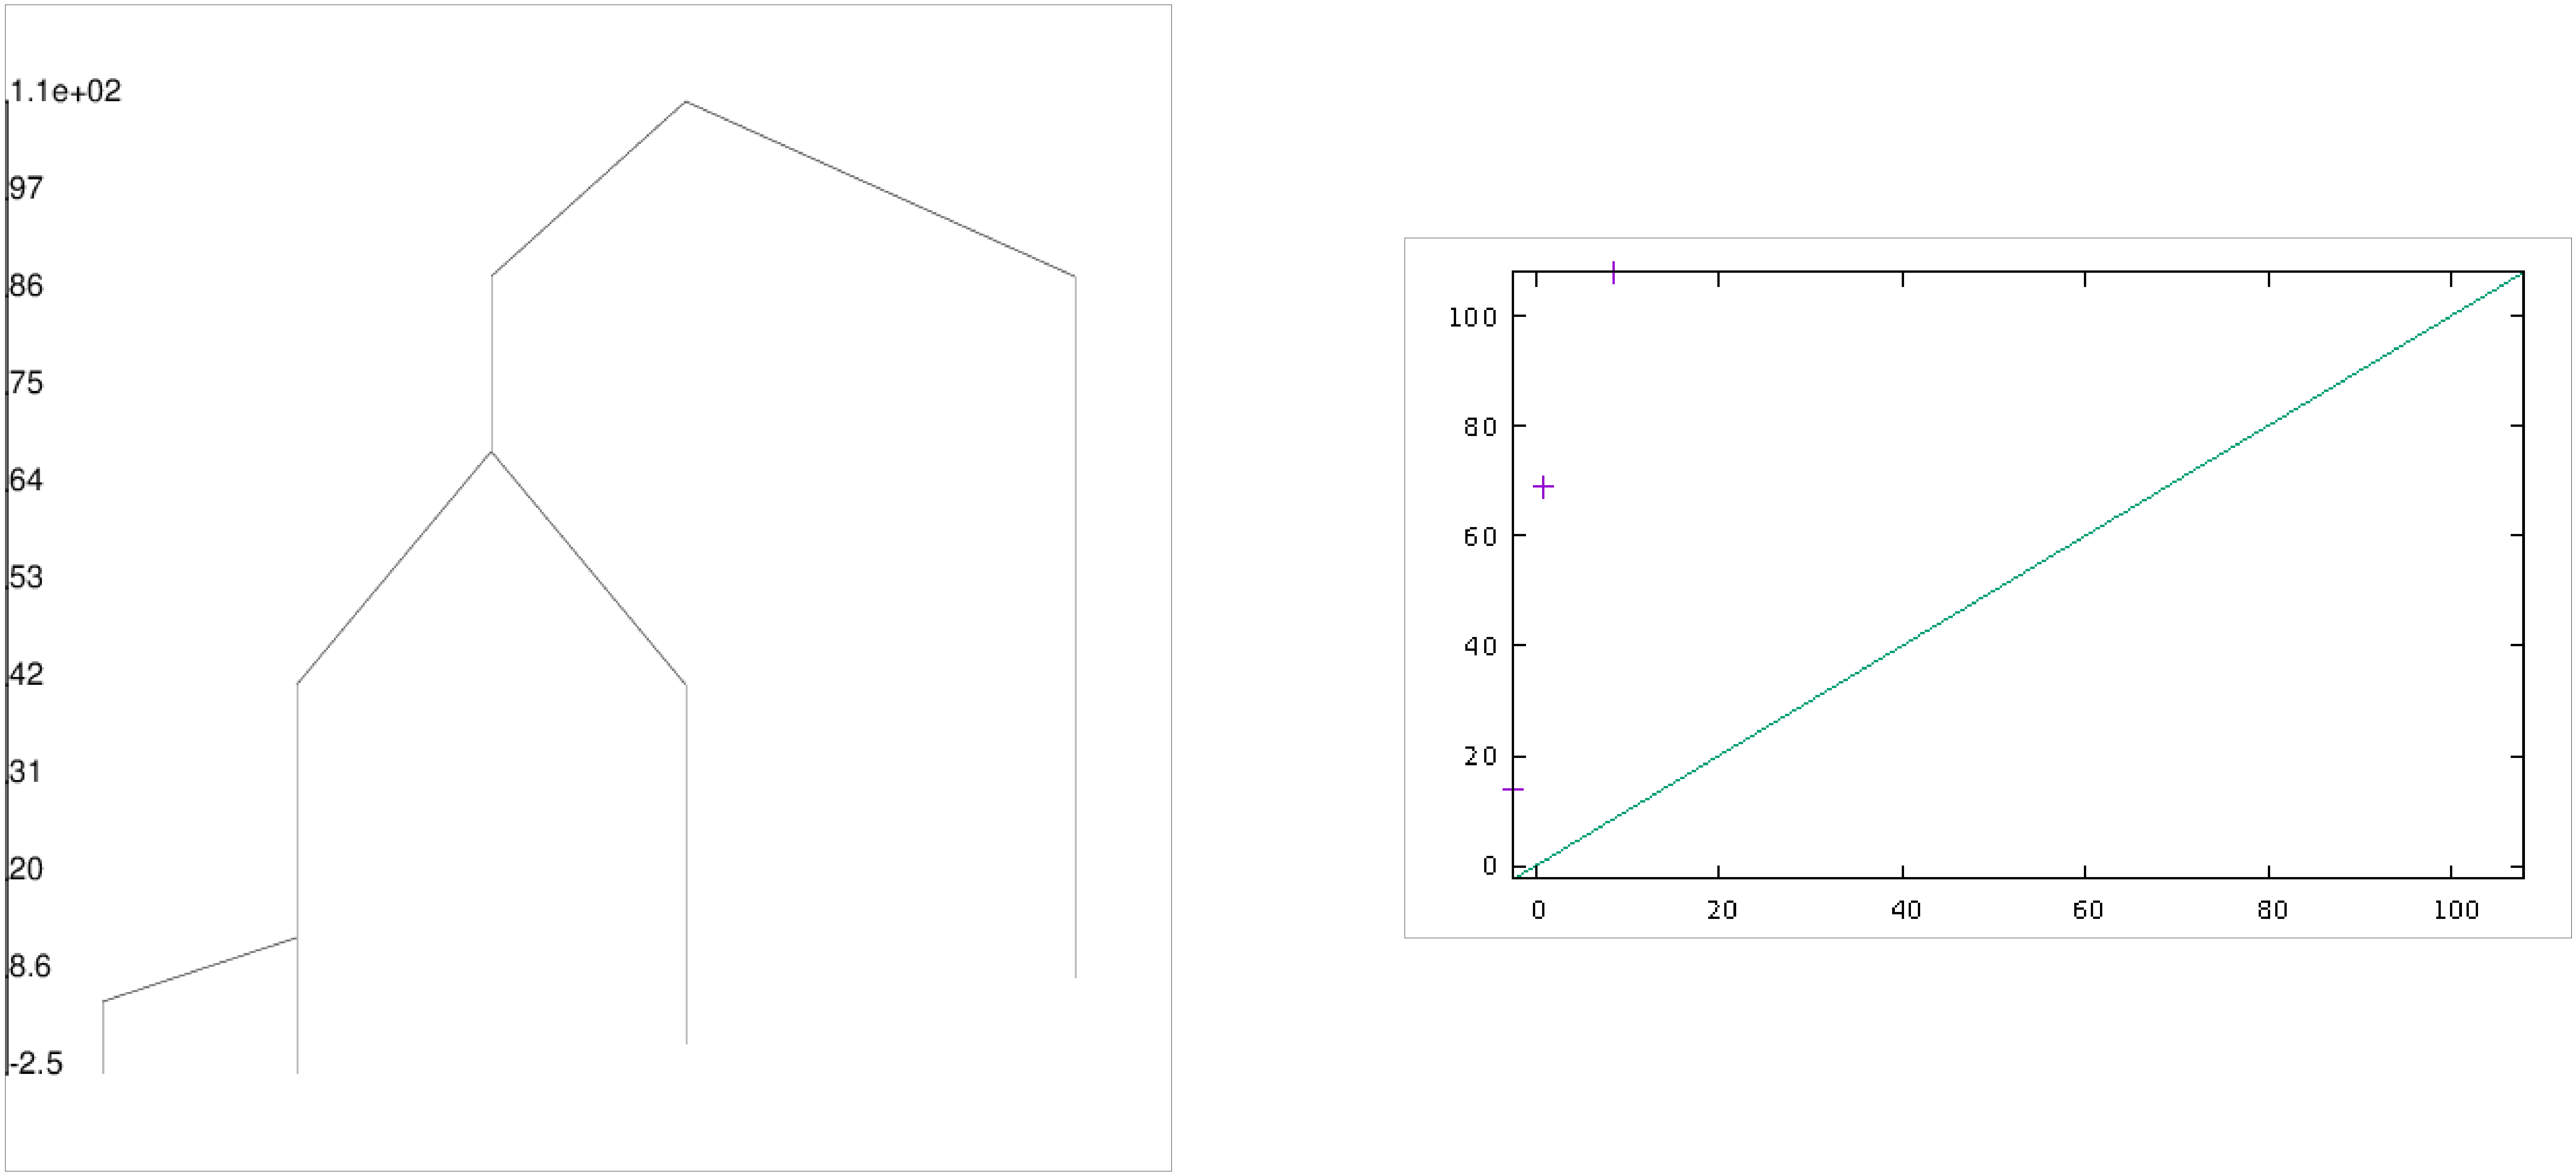

In [6]:
odir = "tmp-results-euclid"

images = []
images.append( sblpyt.find_and_convert("disconnectivity_forest.eps", odir, 100) )
images.append( sblpyt.find_and_convert("persistence_diagram.pdf", odir, 100) )
sblpyt.show_row_n_images(images, 100)

# Example 2:  BLN69


Recall that BLN69 is a toy protein model made of 69 pseudo-amino acids
which are either hydrophoBic, hydrophiLic,or Neutral:

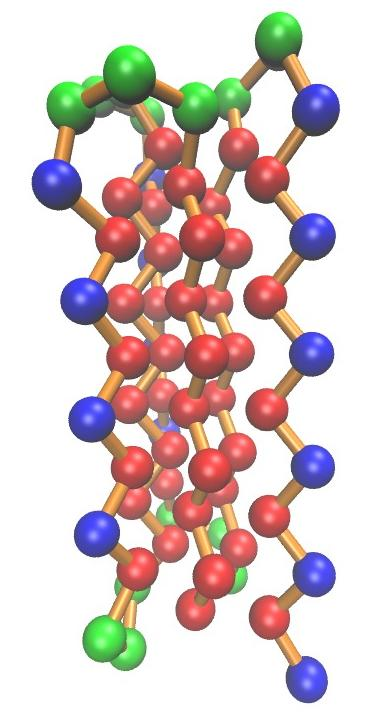

In [7]:

from IPython.display import Image
Image(filename='fig/bln69-visu7305.jpg')

## We first launch the calculation

In [8]:
print("Marker : Calculation Started")
#analyze("euclid", "data/bln69_transition_graph.xml", landmarks = "data/bln69_transition_graph.xml") 
analyze_transition_graph("lrmsd", "data/bln69_transition_graph.xml", landmarks = "data/bln69_landmarks.txt")      
print("Marker : Calculation Ended")

Marker : Calculation Started
Using executable /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-energy-landscape-analysis-lrmsd.exe

Executing sbl-energy-landscape-analysis-lrmsd.exe --transition-graph data/bln69_transition_graph.xml               --directory tmp-results-lrmsd --verbose --log --landmarks --landmarks-filename data/bln69_landmarks.txt --topology --Morse 

All output files in tmp-results-lrmsd: ['sbl-energy-landscape-analysis-lrmsd__disconnectivity_forest.eps\n', 'sbl-energy-landscape-analysis-lrmsd__landmarks_paths.xml\n', 'sbl-energy-landscape-analysis-lrmsd__log.txt\n', 'sbl-energy-landscape-analysis-lrmsd__MSW_chain_complex.xml\n', 'sbl-energy-landscape-analysis-lrmsd__persistence_diagram.pdf\n', 'sbl-energy-landscape-analysis-lrmsd__persistence_diagram.plot\n', 'sbl-energy-landscape-analysis-lrmsd__persistence_diagram.txt\n', 'sbl-energy-landscape-analysis-lrmsd__persistence_histogram.pdf\n', 'sbl-energy-landscape-analysis-lrmsd__persistence_histogram.r\n', '

## We can now easily visualize the main plots i.e. the disconnectivity forest and the persistence diagram

Figs displayed


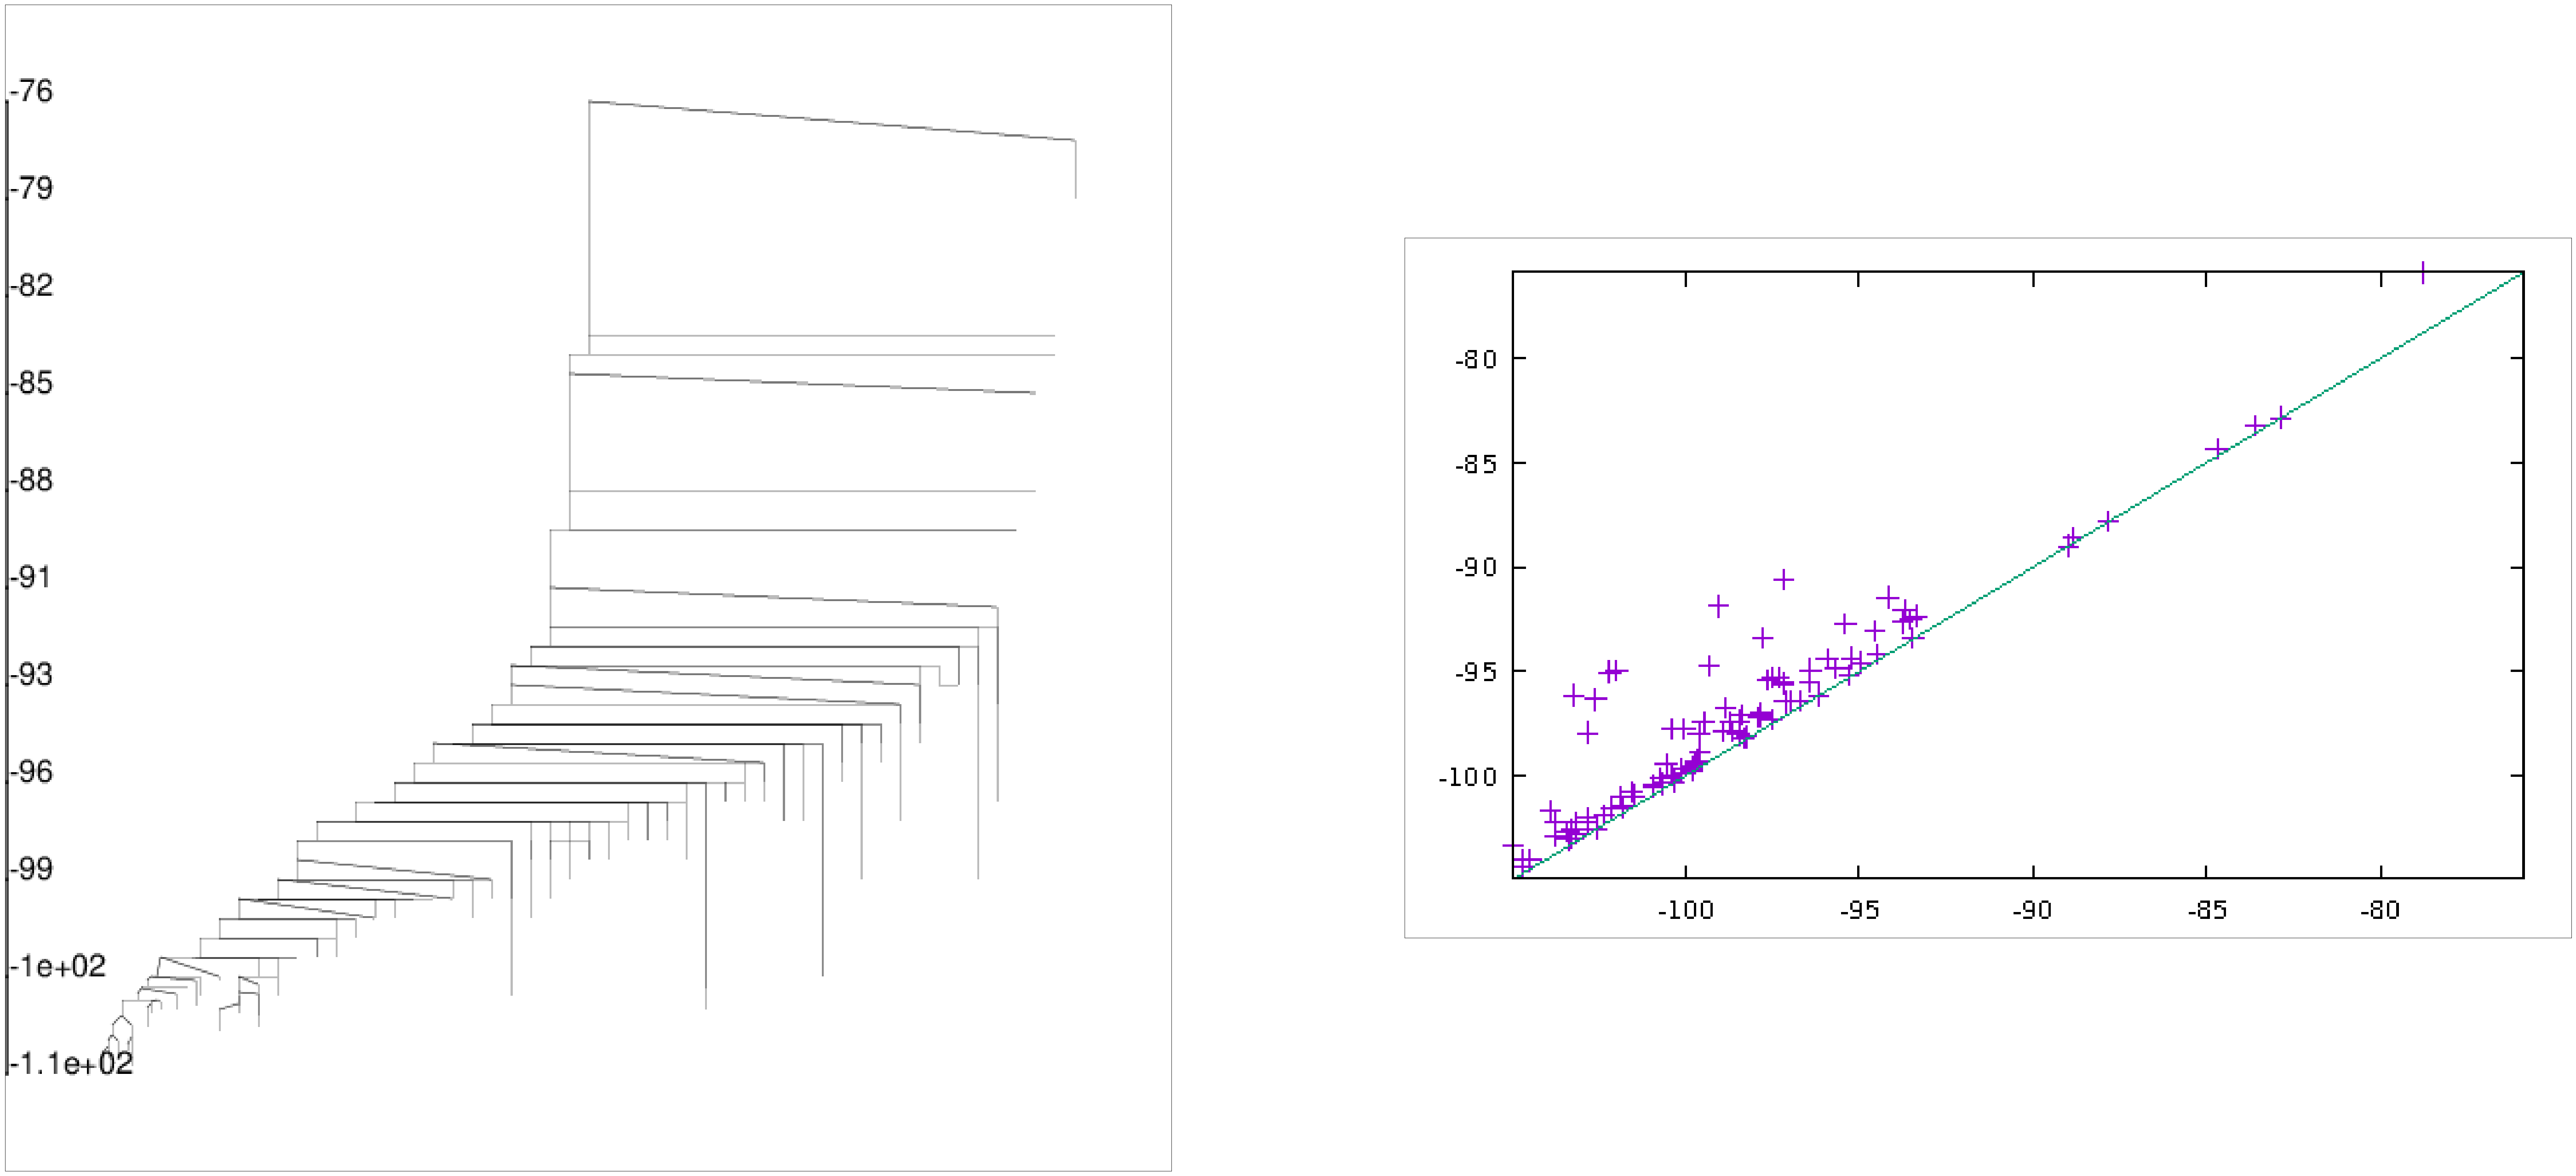

In [9]:
odir = "tmp-results-lrmsd"

images = []
images.append( sblpyt.find_and_convert("disconnectivity_forest.eps", odir, 100) )
images.append( sblpyt.find_and_convert("persistence_diagram.pdf", odir, 100) )
sblpyt.show_row_n_images(images, 100)